In [70]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [87]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, conj(psi_complex))))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [88]:
# TODO: update with contraction method
function mps_and_contract(psi, bond_dim)
    r = length(size(psi))
    sites = MatrixProductState.mps(psi, bond_dim)
    axis_dim = div(length(sites[2]), 2)
    intermediate = reshape(sites[2], axis_dim, 2) * sites[1]
    for i = 2:r-2
                axis_dim = size(sites[i+1])[3]
                left_axis_dim = div(length(sites[i+1]), axis_dim)
                right_axis_dim = div(length(intermediate), axis_dim)
                intermediate =
                    reshape(sites[i+1], left_axis_dim, axis_dim) *
                    reshape(intermediate, axis_dim, right_axis_dim)
            end
    A_mps = sites[r] * reshape(intermediate, 2, 2^(r - 1))
    return abs(dot(A_mps, conj(psi)))
end

mps_and_contract (generic function with 1 method)

Float32[1.1574601, 1.1553773, 1.1522218, 1.1478575, 1.1425462, 1.13668, 1.1235095, 1.0736251, 1.0147896, 1.0000011, 1.0000011, 1.0000011, 1.0000011]

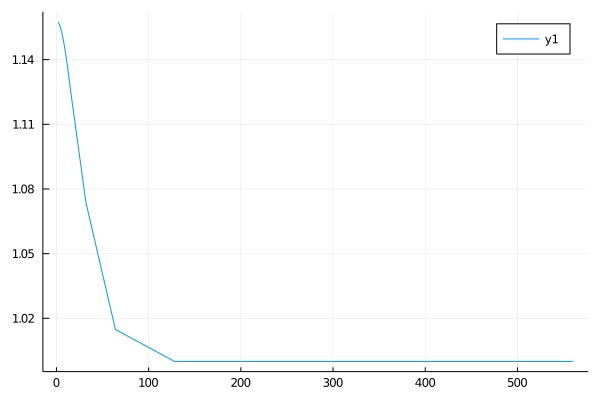

In [89]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims, complex_fidelities) # ? 

[0.8668570373380416, 0.8673142010065298, 0.8679593291292192, 0.8689368308003205, 0.8699659665697539, 0.871147235285322, 0.8748810637147449, 0.892039754515516, 0.9328637889051077, 0.9867215036064574, 0.9999999999999987, 0.9999999999999987, 0.9999999999999987]

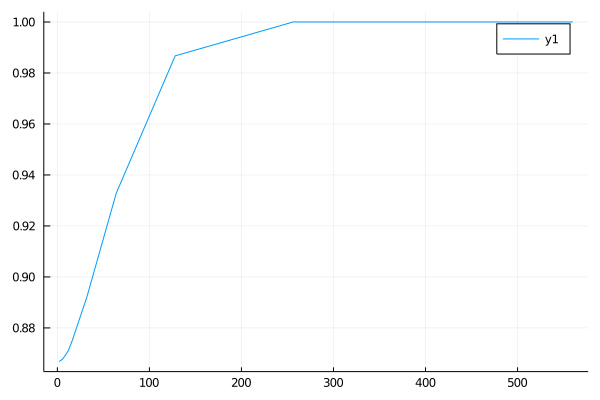

In [90]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims, real_fidelities)